In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2024-05-26 03:28:49--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M   147MB/s    in 0.2s    

2024-05-26 03:28:49 (147 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [ ]:
user_counts = df_ratings['user'].value_counts()
book_counts = df_ratings['isbn'].value_counts()

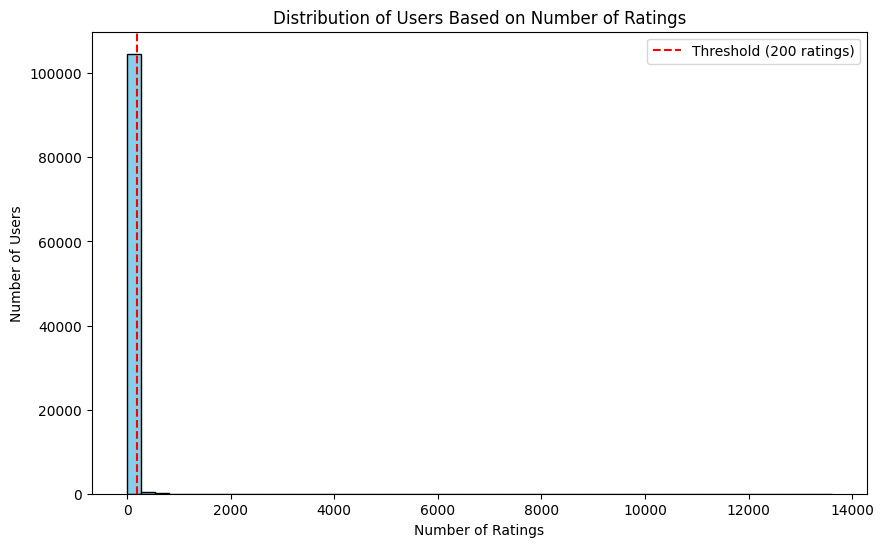

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(user_counts, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=200, color='red', linestyle='--', label='Threshold (200 ratings)')
plt.title('Distribution of Users Based on Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

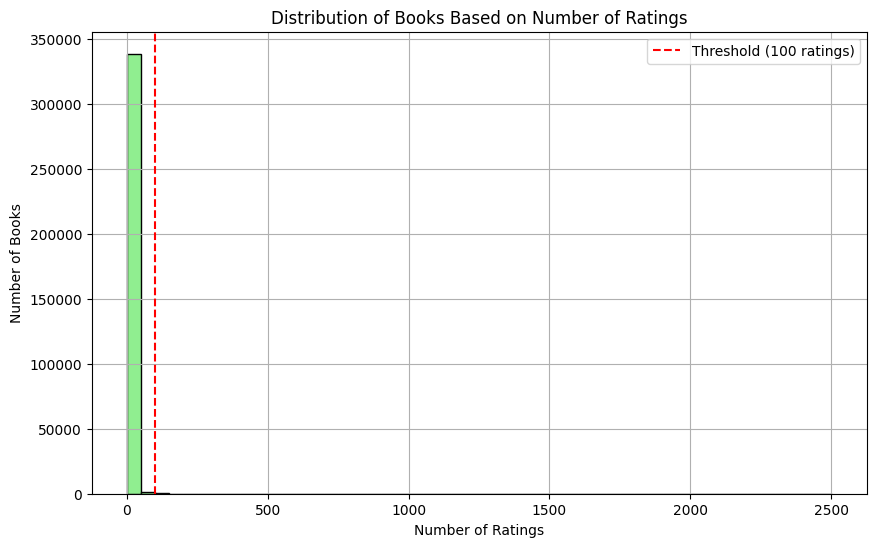

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(book_counts, bins=50, color='lightgreen', edgecolor='black')
plt.axvline(x=100, color='red', linestyle='--', label='Threshold (100 ratings)')
plt.title('Distribution of Books Based on Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
valid_users = user_counts[user_counts >= 200].index
valid_books = book_counts[book_counts >= 100].index

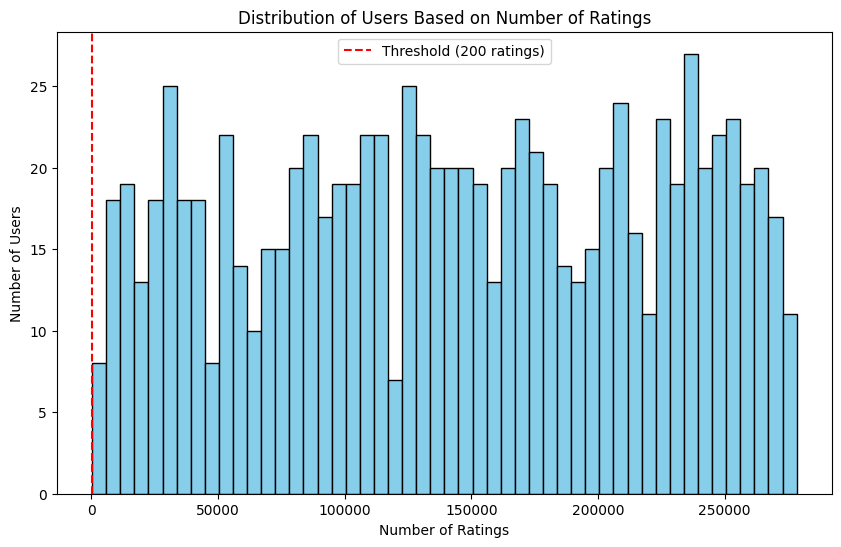

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(valid_users, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=200, color='red', linestyle='--', label='Threshold (200 ratings)')
plt.title('Distribution of Users Based on Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

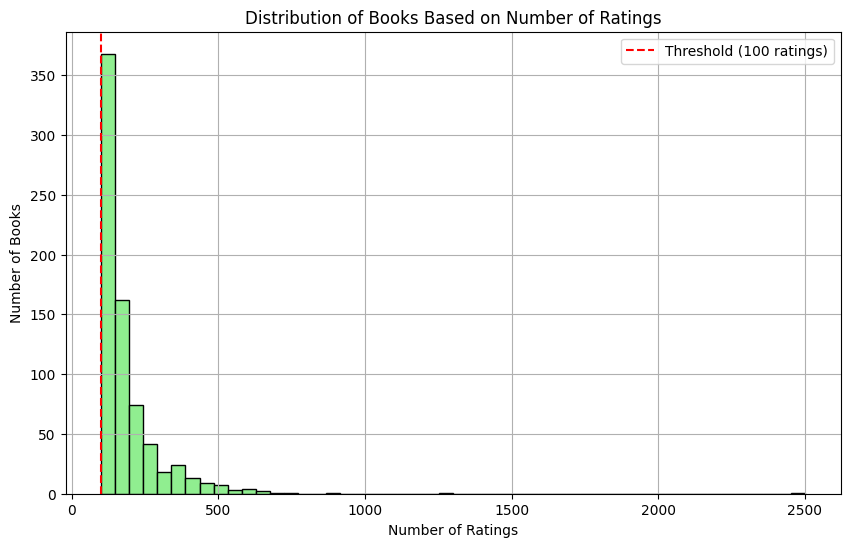

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(book_counts[book_counts >= 100], bins=50, color='lightgreen', edgecolor='black')
plt.axvline(x=100, color='red', linestyle='--', label='Threshold (100 ratings)')
plt.title('Distribution of Books Based on Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_ratings_filtered = df_ratings[df_ratings['user'].isin(valid_users) & df_ratings['isbn'].isin(valid_books)]

In [ ]:
rating_matrix = df_ratings_filtered.pivot_table(index='isbn', columns='user', values='rating')
rating_matrix = rating_matrix.fillna(0)

In [ ]:
rating_matrix.index = rating_matrix.join(df_books.set_index('isbn'))['title']
rating_matrix

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Angels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Boy Next Door,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
About a Boy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How to Be Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
About a Boy (Movie Tie-In),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_recommends(book=""):
  if book == "" or rating_matrix is None:
    return []

  nn_model = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
  nn_model.fit(rating_matrix.values)

  distances, indices = nn_model.kneighbors([rating_matrix.loc[book].values], n_neighbors=6)

  recommended_books = []
  for i in range(1, 6):
      recommended_books.append([rating_matrix.index[indices[0][-i]], distances[0][-i]])

  return [book, recommended_books]

In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.7677075], ['The Lovely Bones: A Novel', 0.7234864]]]
You passed the challenge! 🎉🎉🎉🎉🎉
